In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#corrtype = '2pt'
#xlim = [1.7,5.3]
#xticks = [2,3,4,5]
#xpref = 4
#corrtype = 'd2pt'
#xlim = [1.7,6.3]
#xticks = [2,3,4,5,6]
#xpref = 5
#corrtype = 'gV8'
#corrtype = 'dgV8'
#xlim = [0.7,4.3]
#xticks = [1,2,3,4]
#xpref = 3
#corrtype = 'gV10'
corrtype = 'dgV10'
xlim = [0.7,5.3]
xticks = [1,2,3,4,5]
xpref = 4
npref = 2
filename = './data/3296_stability_%s.csv' %corrtype
data = open(filename,'r')
df = pd.read_csv(filename,index_col=0).T
df

1state_t,1state_Q,1state_dZ0_q0_mean,1state_dZ0_q0_sdev,1state_dgV_q0_mean,1state_dgV_q0_sdev,1state_dZ0_q1_mean,1state_dZ0_q1_sdev,1state_dgV_q1_mean,1state_dgV_q1_sdev,2state_t,...,4state_t,4state_Q,4state_dZ0_q0_mean,4state_dZ0_q0_sdev,4state_dgV_q0_mean,4state_dgV_q0_sdev,4state_dZ0_q1_mean,4state_dZ0_q1_sdev,4state_dgV_q1_mean,4state_dgV_q1_sdev
1,1.590729e-23,-1.581469,0.035154,-2.959691,0.333399,-1.576398,0.034684,-3.477476,0.305780,1.0,...,1.0,0.934898,-1.474901,0.039879,-4.341715,0.218677,-1.483091,0.038620,-4.037845,0.252354
2,1.502555e-24,-1.580011,0.036205,-3.132809,0.358942,-1.575192,0.035643,-3.664769,0.340816,2.0,...,2.0,0.944874,-1.462971,0.040856,-4.316121,0.228503,-1.472746,0.039410,-3.991695,0.309150
3,6.071665e-25,-1.580876,0.036056,-3.136405,0.366991,-1.578003,0.035522,-3.662556,0.343973,3.0,...,3.0,0.939443,-1.461116,0.042646,-4.446842,0.273340,-1.470248,0.041096,-4.011606,0.245057
4,3.960577e-24,-1.579747,0.036200,-2.948222,0.384774,-1.576443,0.035685,-3.473030,0.356839,4.0,...,4.0,0.949915,-1.454587,0.037451,-4.445723,0.222812,-1.464274,0.036447,-4.057205,0.216283
5,8.191905e-25,-1.584134,0.037776,-2.853593,0.407074,-1.579818,0.037206,-3.424572,0.370673,5.0,...,5.0,0.957219,-1.473024,0.047586,-4.581668,0.266838,-1.477139,0.049288,-4.192052,0.333503


In [4]:
# plot params
figsize = (3.50394*2,2*2.1655535534)
ms = '6'
cs = 6
fs_l = 14
fs_xy = 14
ts = 14
lw = 1
plt_axes = [0.14,0.155,0.825,0.825]
# state and q label
pparam = dict()
# state
pparam['color'] = dict()
pparam['color']['1state'] = '#ec5d57' # red
pparam['color']['2state'] = '#70bf41' # green
pparam['color']['3state'] = '#51a7f9' # blue
pparam['color']['4state'] = '#b36ae2' # purple
# q
pparam['shape'] = dict()
pparam['shape']['q0'] = 'o'
pparam['shape']['q1'] = 's'
# label translator
pparam['label'] = dict()
pparam['label']['2pt'] = 'C_{\mathrm{2pt}}(t)'
pparam['label']['d2pt'] = 'C^\prime_{\mathrm{2pt}}(t)'
pparam['label']['gV8'] = 'C_{\mathrm{3pt}}(8,t^\prime)'
pparam['label']['dgV8'] = 'C^\prime_{\mathrm{3pt}}(8,t^\prime)'
pparam['label']['gV10'] = 'C_{\mathrm{3pt}}(10,t^\prime)'
pparam['label']['dgV10'] = 'C^\prime_{\mathrm{3pt}}(10,t^\prime)'

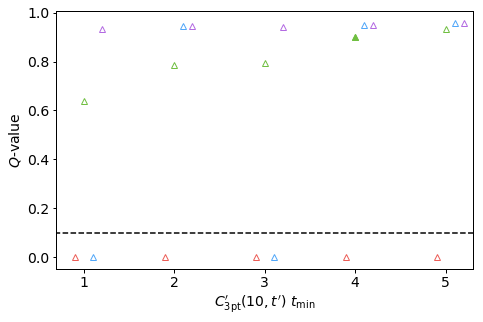

In [5]:
fig = plt.figure('Q-value stability plot',figsize=figsize)
ax = plt.axes(plt_axes)
x = df['2state_t']
for nstate in [1,2,3,4]:
    xshifted = x + 0.1*(nstate-2)
    y = df['%sstate_Q' %nstate]
    ax.errorbar(xshifted,y=y,marker='^',color=pparam['color']['%sstate'%nstate],capsize=cs,markersize=ms,\
                elinewidth=lw,mew=lw,fillstyle='none',label='%s-state' %nstate, ls='none')
# preferred
ax.errorbar(xpref+ 0.1*(npref-2),y=df.loc[df['2state_t']==xpref]['%sstate_Q' %npref],marker='^',color=pparam['color']['%sstate'%npref],capsize=cs,markersize=ms,\
            elinewidth=lw,mew=lw,fillstyle='full',label='%s-state' %npref, ls='none')
ax.errorbar(x=[0,10],y=[0.1,0.1],color='k',ls='--')
#ax.legend(fontsize=fs_l,edgecolor='k',fancybox=False)
ax.set_xlabel(r'$%s$ $t_{\mathrm{min}}$' %pparam['label'][corrtype], fontsize=fs_xy)
ax.set_ylabel(r'$Q$-value', fontsize=fs_xy)
ax.set_xlim(xlim)
ax.set_xticks(xticks)
ax.xaxis.set_tick_params(labelsize=ts,width=lw)
ax.yaxis.set_tick_params(labelsize=ts,width=lw)
[ax.spines[key].set_linewidth(lw) for key in ax.spines]
plt.show()
fig.savefig('./figures/%s_Q.pdf' %corrtype, transparent=True)

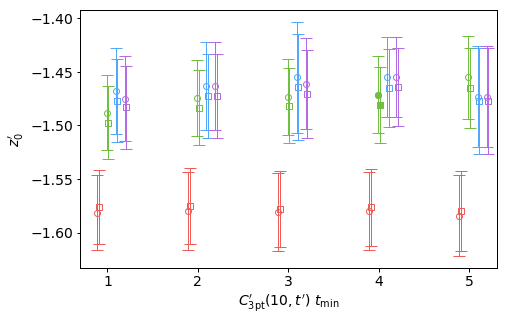

In [6]:
fig = plt.figure('dZ0 stability plot',figsize=figsize)
ax = plt.axes(plt_axes)
x = df['2state_t']
for nstate in [1,2,3,4]:
    for q in [0,1]:
        xshifted = x + 0.1*(nstate-2)
        xshifted = xshifted + 0.02*(q-0.5)
        y = df['%sstate_dZ0_q%s_mean' %(nstate,q)]
        yerr = df['%sstate_dZ0_q%s_sdev' %(nstate,q)]
        ax.errorbar(xshifted,y=y,yerr=yerr,marker=pparam['shape']['q%s' %q],color=pparam['color']['%sstate'%nstate],capsize=cs,markersize=ms,\
                    elinewidth=lw,mew=lw,fillstyle='none',label='%s-state' %nstate, ls='none')
# preferred
for q in [0,1]:
    ax.errorbar(xpref+ 0.1*(npref-2)+0.02*(q-0.5),y=df.loc[df['2state_t']==xpref]['%sstate_dZ0_q%s_mean' %(npref,q)],marker=pparam['shape']['q%s' %q],color=pparam['color']['%sstate'%npref],capsize=cs,markersize=ms,\
                elinewidth=lw,mew=lw,fillstyle='full',label='%s-state' %npref, ls='none')
#ax.legend(fontsize=fs_l,edgecolor='k',fancybox=False)
ax.set_xlabel(r'$%s$ $t_{\mathrm{min}}$' %pparam['label'][corrtype], fontsize=fs_xy)
ax.set_ylabel(r'$z_0^\prime$', fontsize=fs_xy)
ax.set_xlim(xlim)
ax.set_xticks(xticks)
ax.xaxis.set_tick_params(labelsize=ts,width=lw)
ax.yaxis.set_tick_params(labelsize=ts,width=lw)
[ax.spines[key].set_linewidth(lw) for key in ax.spines]
plt.show()
fig.savefig('./figures/%s_dZ0.pdf' %corrtype, transparent=True)

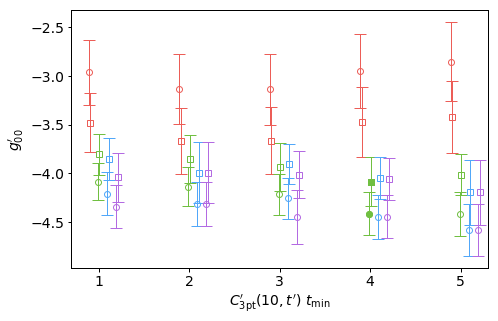

In [7]:
fig = plt.figure('dgV stability plot',figsize=figsize)
ax = plt.axes(plt_axes)
x = df['2state_t']
for nstate in [1,2,3,4]:
    for q in [0,1]:
        xshifted = x + 0.1*(nstate-2)
        xshifted = xshifted + 0.02*(q-0.5)
        y = df['%sstate_dgV_q%s_mean' %(nstate,q)]
        yerr = df['%sstate_dgV_q%s_sdev' %(nstate,q)]
        ax.errorbar(xshifted,y=y,yerr=yerr,marker=pparam['shape']['q%s' %q],color=pparam['color']['%sstate'%nstate],capsize=cs,markersize=ms,\
                    elinewidth=lw,mew=lw,fillstyle='none',label='%s-state' %nstate, ls='none')
for q in [0,1]:
    ax.errorbar(xpref+ 0.1*(npref-2)+ 0.02*(q-0.5),y=df.loc[df['2state_t']==xpref]['%sstate_dgV_q%s_mean' %(npref,q)],marker=pparam['shape']['q%s' %q],color=pparam['color']['%sstate'%npref],capsize=cs,markersize=ms,\
                elinewidth=lw,mew=lw,fillstyle='full',label='%s-state' %npref, ls='none')
#ax.legend(fontsize=fs_l,edgecolor='k',fancybox=False)
ax.set_xlabel(r'$%s$ $t_{\mathrm{min}}$' %pparam['label'][corrtype], fontsize=fs_xy)
ax.set_ylabel(r'$g_{00}^\prime$', fontsize=fs_xy)
ax.set_xlim(xlim)
ax.set_xticks(xticks)
ax.xaxis.set_tick_params(labelsize=ts,width=lw)
ax.yaxis.set_tick_params(labelsize=ts,width=lw)
[ax.spines[key].set_linewidth(lw) for key in ax.spines]
plt.show()
fig.savefig('./figures/%s_dgV.pdf' %corrtype, transparent=True)

In [25]:
# logGBF of preferred fit
nstate = [1,2,3,4]
logGBF = np.array([830.19,901.76,897.74,897.7])
normgbf = [np.exp(i-max(logGBF)) for i in logGBF]
normgbf

1

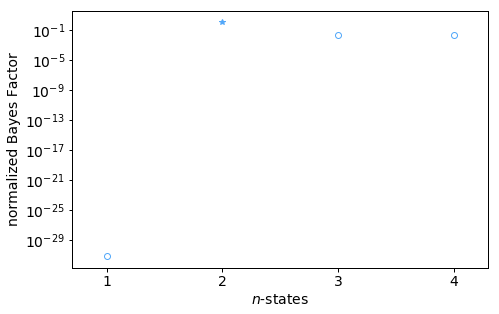

In [27]:
fig = plt.figure('logGBF plot',figsize=figsize)
ax = plt.axes(plt_axes)
for idx in range(len(normgbf)):
    if idx != np.argmax(normgbf):
        ax.errorbar(x=nstate[idx],y=normgbf[idx],marker='o',capsize=cs,markersize=ms,color='#51a7f9',\
                    elinewidth=lw,mew=lw,fillstyle='none', ls='none')
ax.errorbar(x=nstate[np.argmax(normgbf)],y=normgbf[np.argmax(normgbf)],marker='*',capsize=cs,markersize=ms,color='#51a7f9',\
            elinewidth=lw,mew=lw,fillstyle='full', ls='none')
ax.set_xlabel(r'$n$-states', fontsize=fs_xy)
ax.set_ylabel(r'normalized Bayes Factor', fontsize=fs_xy)
ax.set_xlim([0.7,4.3])
ax.set_xticks([1,2,3,4])
ax.xaxis.set_tick_params(labelsize=ts,width=lw)
ax.yaxis.set_tick_params(labelsize=ts,width=lw)
ax.set_yscale('log')
[ax.spines[key].set_linewidth(lw) for key in ax.spines]
plt.show()
fig.savefig('./figures/logGBF.pdf', transparent=True)